In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.metrics
import seaborn as sns
#import efficientnet.tfkeras as efn
from collections import Counter
from keras_preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from keras.models import  Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, GlobalAveragePooling2D, BatchNormalization, Concatenate
from keras.callbacks import EarlyStopping
from keras.layers.convolutional import Conv1D, Conv2D, MaxPooling2D
from keras.utils import np_utils
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

plt.style.use('ggplot')

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from tensorflow.keras.applications import EfficientNetB4

In [ ]:
EfNetB4_conv = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in EfNetB4_conv.layers:
    layer.trainable = True

for layer in EfNetB4_conv.layers:
    print(layer, layer.trainable)

model = models.Sequential()

model.add(EfNetB4_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(13, activation='softmax'))

model.summary()

71696384/71686520 [==============================] - 1s 0us/step
<keras.engine.input_layer.InputLayer object at 0x7fba0324f1d0> True
<keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7fb9f04bcad0> True
<keras.layers.preprocessing.normalization.Normalization object at 0x7fba0162e250> True
<keras.layers.convolutional.ZeroPadding2D object at 0x7fb9f0474ad0> True
<keras.layers.convolutional.Conv2D object at 0x7fb9f03ce150> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fb9f03f9f50> True
<keras.layers.core.activation.Activation object at 0x7fb9f0348ed0> True
<keras.layers.convolutional.DepthwiseConv2D object at 0x7fb9f02ffdd0> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fb9f0304790> True
<keras.layers.core.activation.Activation object at 0x7fb9f0332850> True
<keras.layers.pooling.GlobalAveragePooling2D object at 0x7fb9f0332c50> True
<keras.layers.core.reshape.Reshape object at 0x7fb9f02c17d0> 

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001, rho=0.9)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

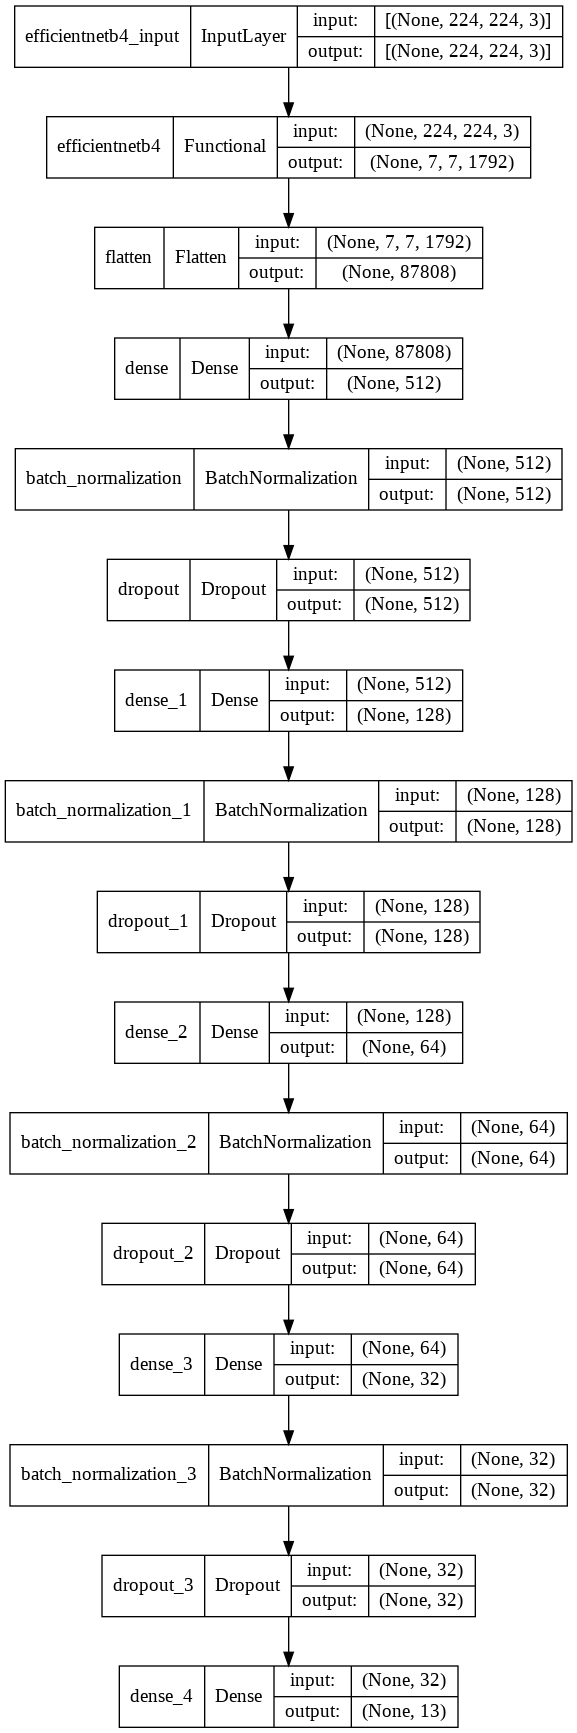

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names = True)
from IPython.display import Image
Image(filename='model.png')

In [ ]:
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = False)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Birddata_split/New_8_1/train/',
                                                 target_size = (224, 224),
                                                 shuffle=True)

Found 10590 images belonging to 13 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Birddata_split/New_8_1/val/',
                                            target_size = (224, 224), shuffle=False)

Found 1303 images belonging to 13 classes.


In [ ]:
for cls, idx in training_set.class_indices.items():
    print('Class nr ',idx,' -> ', cls)

Class nr  0  ->  0Capri
Class nr  1  ->  10Pachy
Class nr  2  ->  12Phyll
Class nr  3  ->  14Macro
Class nr  4  ->  1Pnoep
Class nr  5  ->  2Malac
Class nr  6  ->  3Malac
Class nr  7  ->  4Anthi
Class nr  8  ->  5Anthr
Class nr  9  ->  6Corvu
Class nr  10  ->  7Dryoc
Class nr  11  ->  8Elanu
Class nr  12  ->  9Ortho


In [ ]:
model_history = model.fit(training_set, batch_size=16, epochs=11, verbose=1, validation_data=(test_set))

Epoch 1/11
331/331 [==============================] - 4309s 13s/step - loss: 2.2121 - accuracy: 0.3203 - val_loss: 2.6132 - val_accuracy: 0.1750
Epoch 2/11
331/331 [==============================] - 679s 2s/step - loss: 1.4196 - accuracy: 0.5971 - val_loss: 1.8538 - val_accuracy: 0.4313
Epoch 3/11
331/331 [==============================] - 679s 2s/step - loss: 1.0434 - accuracy: 0.7379 - val_loss: 1.2080 - val_accuracy: 0.6470
Epoch 4/11
331/331 [==============================] - 678s 2s/step - loss: 0.8504 - accuracy: 0.7905 - val_loss: 0.9900 - val_accuracy: 0.7122
Epoch 5/11
331/331 [==============================] - 679s 2s/step - loss: 0.6952 - accuracy: 0.8367 - val_loss: 0.8508 - val_accuracy: 0.7529
Epoch 6/11
331/331 [==============================] - 679s 2s/step - loss: 0.5934 - accuracy: 0.8647 - val_loss: 0.9098 - val_accuracy: 0.7429
Epoch 7/11
331/331 [==============================] - 679s 2s/step - loss: 0.4963 - accuracy: 0.8882 - val_loss: 0.6023 - val_accuracy: 0.84

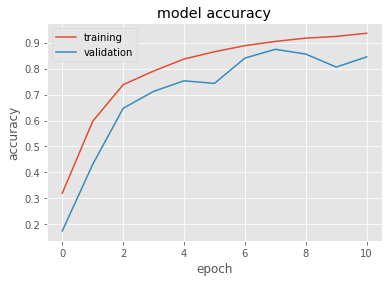

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

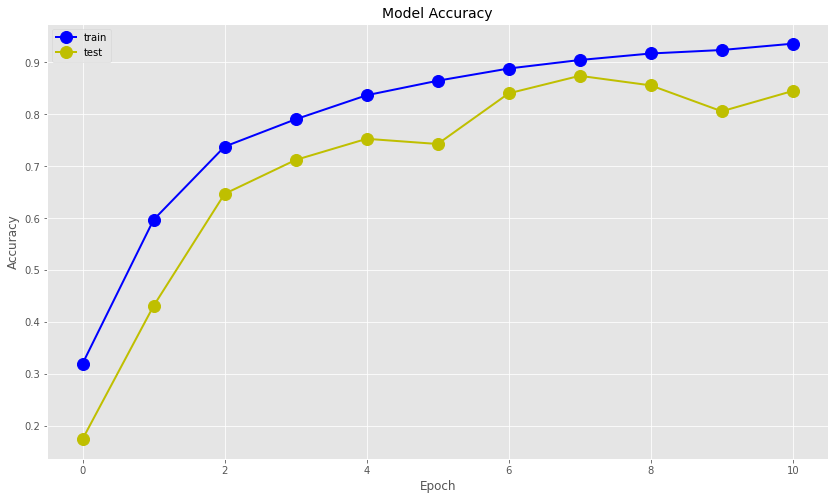

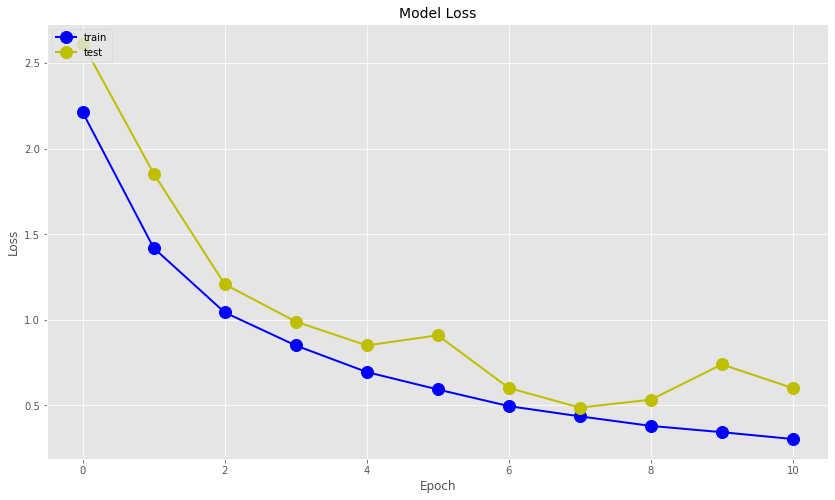

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(model_history.history['accuracy'], 'bo-', linewidth=2, markersize=12)
plt.plot(model_history.history['val_accuracy'], 'yo-', linewidth=2, markersize=12)
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

 # summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(model_history.history['loss'], 'bo-', linewidth=2, markersize=12 )
plt.plot(model_history.history['val_loss'], 'yo-', linewidth=2, markersize=12)
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
target_names = []
for key in training_set.class_indices:
  target_names.append(key)

print(target_names)

['0Capri', '10Pachy', '12Phyll', '14Macro', '1Pnoep', '2Malac', '3Malac', '4Anthi', '5Anthr', '6Corvu', '7Dryoc', '8Elanu', '9Ortho']


41/41 [==============================] - 17s 404ms/step - loss: 0.6011 - accuracy: 0.8450
n Test_Accuracy:- 0.8449731469154358
confusion matrix
[[ 67   1   6   1   3   2   0   0   0   0   0   0   0]
 [  0  35   0   2   1   4  11   0   1   0   0   0   0]
 [  0   1 264   0  10   2   0   0   0   0   0   0   0]
 [  1   3  13 149   2   2  11   2   0   0   0   0   0]
 [  0   0   1   1 139   5   0   2   0   0   0   0   0]
 [  0   1   1   0   0  60   0   0   0   0   0   0   0]
 [  1   6   3   2   1   1  57   0   0   3   2   0   4]
 [  0   0   0   0   4   0   1  35   0   0   0   0   0]
 [  5   2   3   0   1   0   4   0  31   1   1   0   0]
 [  0   0  12   3   2   2   0   0   0  51   1   0   0]
 [  1   1   0   3   1   1   7   0   0   0  43   0   1]
 [  0   3  12   2   0   6   0   0   0   0   1 114   0]
 [  0   3   2   2   0   0   1   0   0   0   0   0  56]]


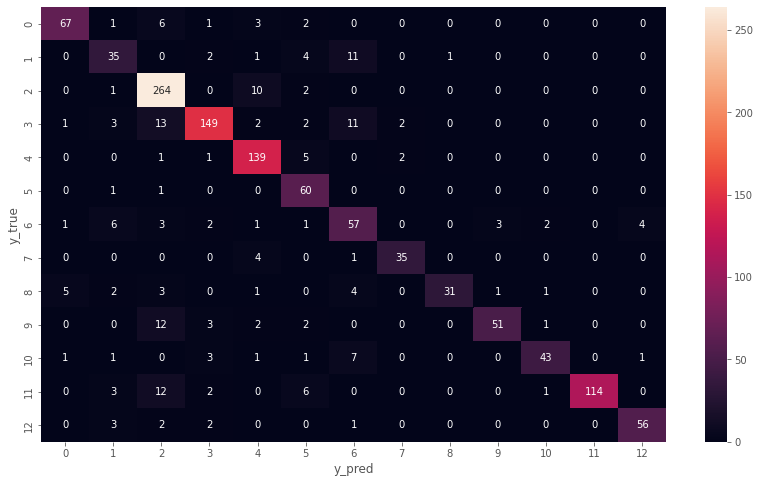

In [ ]:
accuracy = model.evaluate(test_set)
print('n', 'Test_Accuracy:-', accuracy[1])
pred = model.predict(test_set)
y_pred = np.argmax(pred, axis=1)
#y_true = np.argmax(pred, axis=1)
print('confusion matrix')
print(confusion_matrix(test_set.classes, y_pred))
    #confusion matrix
f, ax = plt.subplots(figsize=(14,8))
sns.heatmap(confusion_matrix(test_set.classes, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
print('Classification Report')
print(classification_report(test_set.classes, y_pred, target_names=target_names ))

Classification Report
              precision    recall  f1-score   support

      0Capri       0.89      0.84      0.86        80
     10Pachy       0.62      0.65      0.64        54
     12Phyll       0.83      0.95      0.89       277
     14Macro       0.90      0.81      0.86       183
      1Pnoep       0.85      0.94      0.89       148
      2Malac       0.71      0.97      0.82        62
      3Malac       0.62      0.71      0.66        80
      4Anthi       0.90      0.88      0.89        40
      5Anthr       0.97      0.65      0.78        48
      6Corvu       0.93      0.72      0.81        71
      7Dryoc       0.90      0.74      0.81        58
      8Elanu       1.00      0.83      0.90       138
      9Ortho       0.92      0.88      0.90        64

    accuracy                           0.84      1303
   macro avg       0.85      0.81      0.82      1303
weighted avg       0.86      0.84      0.85      1303



In [ ]:
model.save('/content/drive/MyDrive/Birddata_split/resnet50_mels15.hdf5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
finalpreds = pd.DataFrame(y_pred)
#finalpreds.columns = sub_temp.columns
finalpreds.to_csv('/content/drive/MyDrive/Birddata_split/submit15.csv',index=False)

In [ ]:
target_names1 = []
for key in test_set.class_indices:
  target_names1.append(key)

print(target_names1)

['0Capri', '10Pachy', '12Phyll', '14Macro', '1Pnoep', '2Malac', '3Malac', '4Anthi', '5Anthr', '6Corvu', '7Dryoc', '8Elanu', '9Ortho']


ROC AUC score: 0.8991921990044638


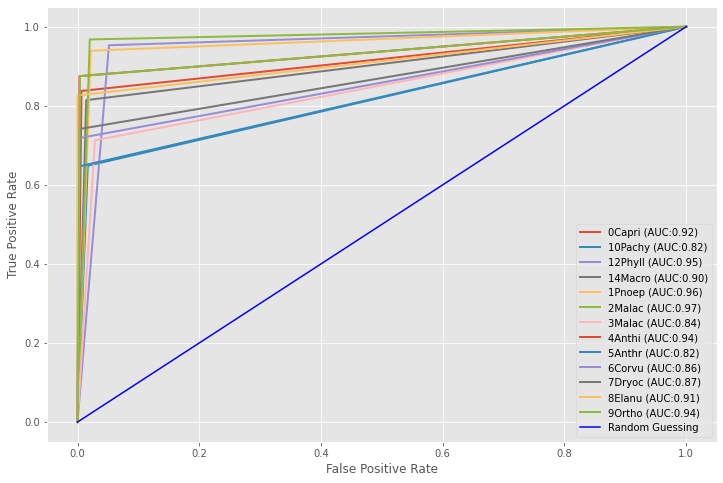

In [ ]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_preds, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_preds = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target_names1):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_preds[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)),linewidth=2)
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_preds, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(test_set.classes, pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

In [ ]:
top_k_accuracy_score(test_set.classes, pred, k=5)

0.9462778204144282

In [ ]:
top_k_accuracy_score(test_set.classes, pred, k=5, normalize=False)

1233

In [ ]:
top_k_accuracy_score(test_set.classes, pred, k=1)

0.8303914044512664

In [ ]:
top_k_accuracy_score(test_set.classes, pred, k=1, normalize=False)

1082